# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
$P(A)$: 
<p><b>Prior probability</b> "probability of selecting from a particular bowl, without any additional information about what is selected" </p>
$P(B|A)$:
<p><b>Likelihood</b>, "probability of selecting a vanilla cookie given it came from a particular bowl"</p>
$P(B)$:
<p><b>marginal likelihood</b>, "probability of event B, picking a vanilla cookie from both bowls"</p>
$P(A|B)$:
<p><b>posterior probability</b>, "probability of selecting from a given bowl givein that the cookie is vanilla"</p>

In [2]:
pOfA = 0.5 # probability of picking from bowl 1
pOfB_given_A =  (30.0/40.0) # probability of selecting a cookie given its from bowl 1
pOfB_given_Ac = (20.0/40.0) # probability of selecting from bowl 2
pOfB = (pOfB_given_A * pOfA) + (pOfB_given_Ac * pOfA) # law of total probabilities, sum of probabilities of B given A and not A

In [4]:
# probability vanilla cookie came from bowl 1
pOfA_given_B = (pOfB_given_A * pOfA) / pOfB
print('Probability that vanilla cookie came from bowl 1 P(A|B) = {}'.format(pOfA_given_B))

Probability that vanilla cookie came from bowl 1 P(A|B) = 0.6


What is the probability that it came from Bowl 2?

In [6]:
# probability of choosing from bowl 2
print('Probability that vanilla cookie came from bowl 2 P(Ac|B) = {}'.format((pOfA * pOfA)/pOfB))

Probability that vanilla cookie came from bowl 2 P(Ac|B) = 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [7]:
# bowl 1
new_marg = (0.25 * 0.5) + (0.5 * 0.5)
print('Bowl 1 = {}'.format((0.25 * 0.5) / new_marg))
print('Bowl 2 = {}'.format((0.5 * 0.5) / new_marg))

Bowl 1 = 0.3333333333333333
Bowl 2 = 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [8]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

What is the probability that the yellow candy came from Bag 2?

In [14]:
priors = [0.5, 0.5] # prior probability of picking from either bag
likelihoods = [0.20 * 0.20, 0.14 * 0.10]
print('Probability that the yellow candy came from Bag 2 = {}'.format(bayes_rule(priors, likelihoods)[1]))

Probability that the yellow candy came from Bag 2 = 0.25925925925925924


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [26]:
expr = bayes_rule(priors, [1.0 - bae for bae in bayes_rule(priors, likelihoods)])
print('Probability that green one came from \nbag 1 = {}\nbag 2 = {}'.format(expr[0], expr[1]))

Probability that green one came from 
bag 1 = 0.25925925925925924
bag 2 = 0.7407407407407408


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

<table>
	<tr>
		<th></th>
		<th>Prior</th>
		<th>Likelihood</th>
		<th>marg</th>
		<th>Posterior</th>
	</tr>
	<tr>
		<td>Hypothesis</td>
		<td>P(H)</td>
		<td>P(D|H)</td>
		<td>P(H)P(D|H)</td>
		<td>P(H|D)</td>
	</tr>
	<tr>
		<td>Door A</td>
		<td>1/3</td>
		<td>1/2</td>
		<td>1/6</td>
		<td>1/3</td>
	</tr>
	<tr>
		<td>Door B</td>
		<td>1/3</td>
		<td>0</td>
		<td>0</td>
		<td>0</td>
	</tr>
	<tr>
		<td>Door C</td>
		<td>1/3</td>
		<td>1</td>
		<td>1/3</td>
		<td>2/3</td>
	</tr>
</table>

In [30]:
priors = [1/3, 1/3, 1/3]
likelihoods = [1/2, # Chooses A, Host opens B, likelihood of car behind A is 1/2 (A or C), and 0 for B
               0,
               1] # since B was opened P(B) became 0 (no car) and C becomes 1
print("Door A, B, and C probabilities of finding car behind each: \n")
print(*bayes_rule(priors, likelihoods), sep = '\n')

Door A, B, and C probabilities of finding car behind each: 

0.3333333333333333
0.0
0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

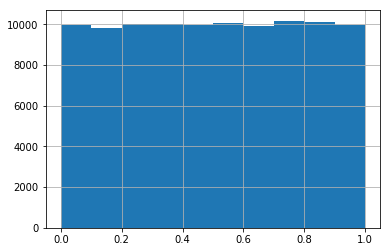

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# generate random uniform dist and visualize

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size = n_draws))

prior.hist()

Produce a set of descriptive statistics for the posterior distribution.

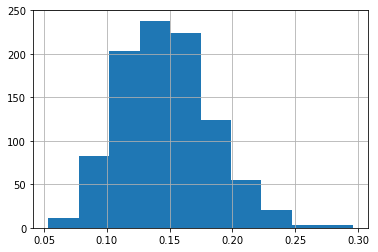

In [33]:
observed = 14 # people who signed up for landscaping

def generative_model(n, param):
    # simulates 100 visitors visiting the site a large number of times
    # using random probability param form priors
    # returns number of successes over n trials
    result = np.random.binomial(n, param)
    return result

sim_data = [generative_model(100, p) for p in prior]

posterior = prior[list(map(lambda x: x == observed, sim_data))]
posterior.hist()

In [34]:
posterior.describe()

count    965.000000
mean       0.147080
std        0.036049
min        0.053402
25%        0.121287
50%        0.143579
75%        0.169429
max        0.295836
dtype: float64

What is the 90% credible interval range?

In [35]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.08579442504200019 | 0.2270861671186677


What is the Maximum Likelihood Estimate?

In [36]:
rounded = posterior.round(2) # convert to percentages
mode = rounded.mode()[0] # find the mode within the list
probability = list(rounded).count(mode)/len(rounded) 
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.14 | 0.11398963730569948
